## **Nama** **Raynaldy mochamad omar f**

# Nim **221351118**

# Business Understanding

## Project Domain

Machine Learning / Data Science - Predictive Analytics in Transportation Safety

Proyek ini berada dalam domain data science dan machine learning, dengan fokus pada analisis data historis kecelakaan kapal untuk memprediksi kelangsungan hidup penumpang.

## Problem Statements

1.Banyak penumpang Titanic kehilangan nyawa dalam kecelakaan tersebut, namun belum ada pemahaman yang menyeluruh mengenai faktor-faktor yang paling signifikan dalam menentukan kelangsungan hidup.

2.Data historis yang tersedia belum sepenuhnya dimanfaatkan untuk membangun sistem prediksi yang dapat membantu dalam analisis keselamatan transportasi.

3.Tidak ada model prediktif yang efektif yang bisa digunakan untuk mengidentifikasi profil penumpang dengan kemungkinan selamat yang lebih tinggi.

## Goals
1.Mengembangkan model machine learning untuk memprediksi apakah seorang penumpang Titanic akan selamat atau tidak berdasarkan atribut seperti usia, jenis kelamin, kelas tiket, dan lainnya.

2.Mengidentifikasi faktor-faktor utama yang mempengaruhi kelangsungan hidup penumpang.

3.Menyediakan insight yang dapat digunakan untuk meningkatkan protokol keselamatan dalam transportasi publik.

## Solution Statements

1.Menggunakan dataset Titanic untuk melakukan eksplorasi data, pembersihan data, dan feature engineering.

2.Melatih dan mengevaluasi berbagai algoritma machine learning (seperti Logistic Regression, Decision Tree, Random Forest, Ann.) untuk menemukan model prediksi terbaik.

3.Menyediakan visualisasi dan analisis interpretatif untuk mendukung temuan dan rekomendasi berbasis data.

# Data Understanding

## Import data dari kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raynaldymochammad","key":"ec0e8562af7b25e557ae2a6684a790c1"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d yasserh/titanic-dataset


Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 103MB/s]


In [5]:
!mkdir titanic
!unzip -qq titanic-dataset.zip -d titanic
!ls titanic

Titanic-Dataset.csv


## Import Library yang dibutuhkan

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report


## Exploratory Data Analysis

In [8]:
df = pd.read_csv('/content/titanic/Titanic-Dataset.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


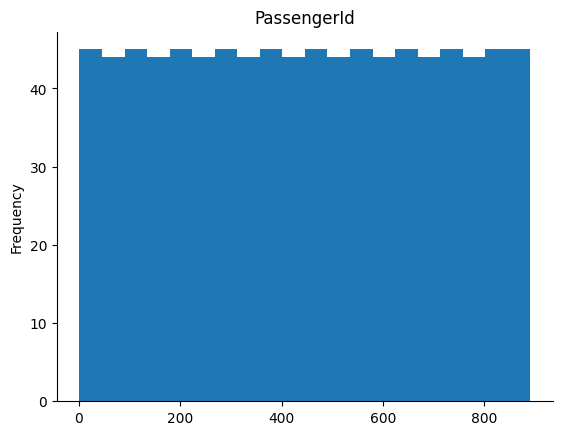

In [11]:
# @title Passengerid (Id penumpang)
from matplotlib import pyplot as plt
df['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

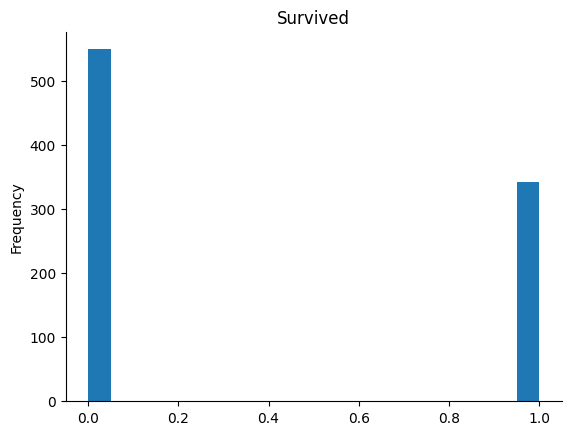

In [ ]:
# @title Survived (Bertahan hidup)

from matplotlib import pyplot as plt
df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

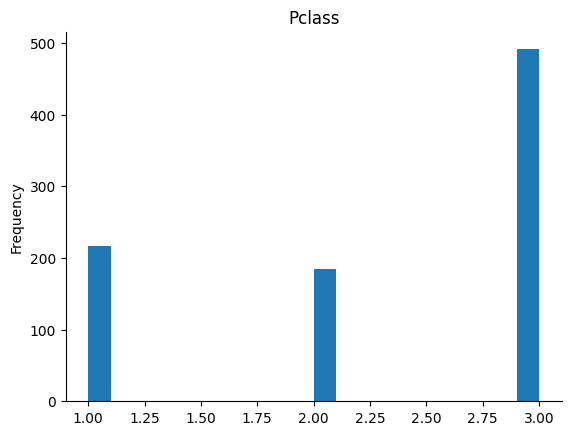

In [ ]:
# @title Pclass (Kelas penumpang)

from matplotlib import pyplot as plt
df['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

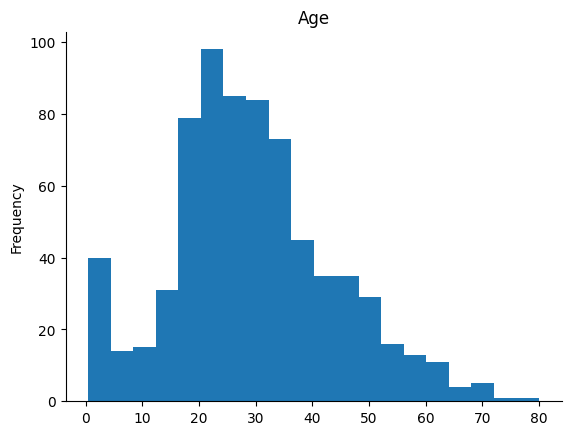

In [ ]:
# @title Age (Umur)

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

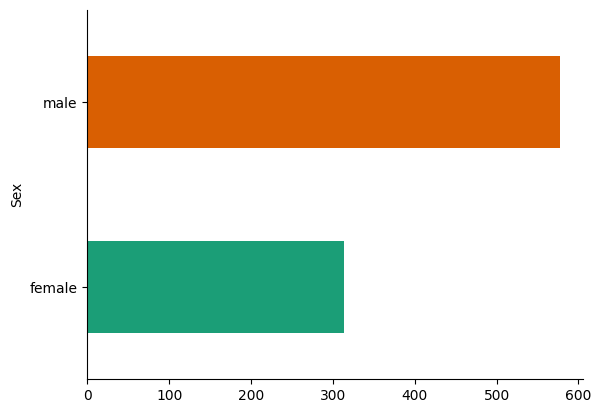

In [ ]:
# @title Sex (Jenis kelamin)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

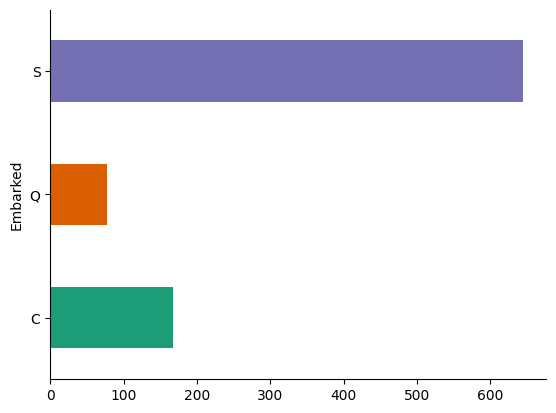

In [ ]:
# @title Embarked (Pelabuhan)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

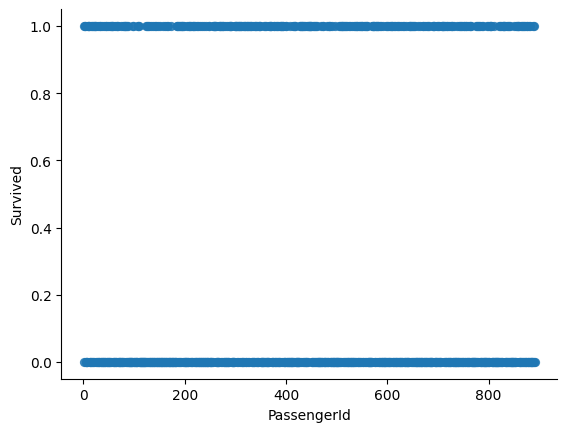

In [ ]:
# @title Passenger vs Survived (Penumpang dan bertahan hidup)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Preparation

In [12]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
cols_to_drop_exist = [col for col in cols_to_drop if col in df.columns]

In [13]:
if cols_to_drop_exist:
    df = df.drop(cols_to_drop_exist, axis=1)
else:
    print("Columns to drop not found in DataFrame.")

In [14]:
# Mengatasi missing value di kolom 'Age' dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-14-936268137>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-14-936268137>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [15]:
# Encoding fitur kategorikal
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    df[col] = le.fit_transform(df[col])

In [16]:
# Pisahkan fitur dan label
X = df.drop('Survived', axis=1)
y = df['Survived']

In [17]:
# Normalisasi fitur numerik
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [18]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [19]:
# Define the ANN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

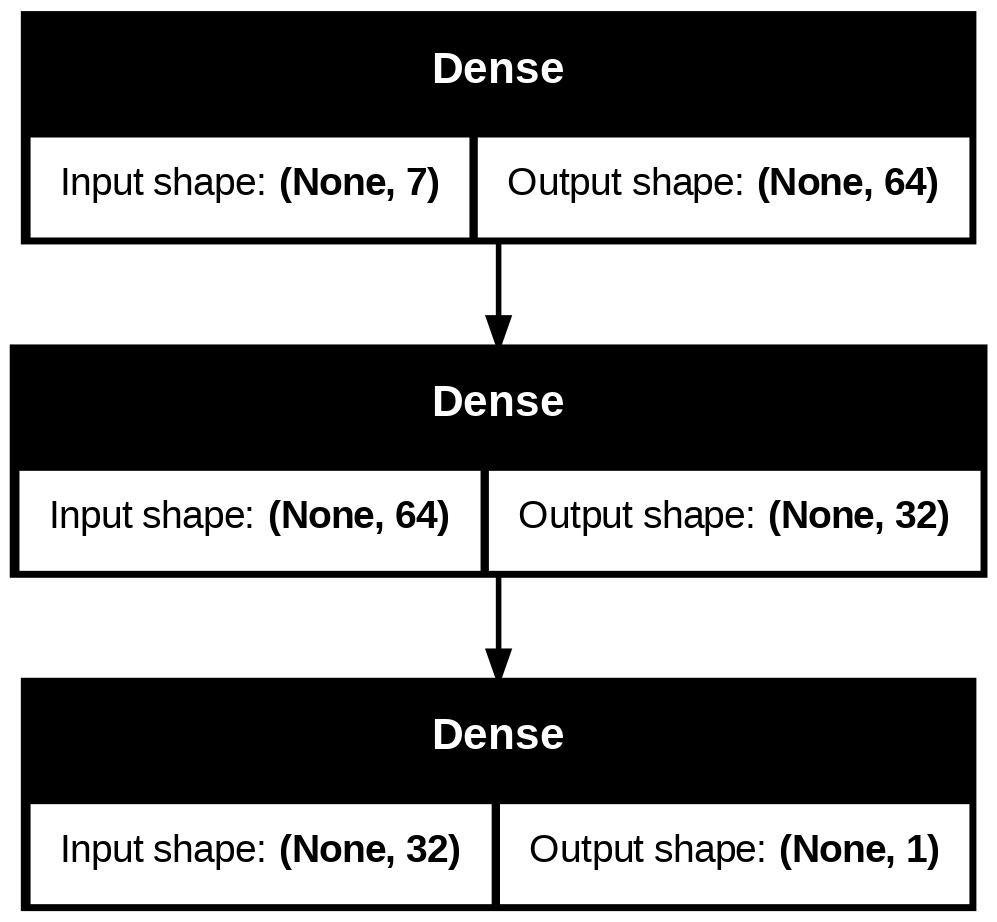

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6068 - loss: 0.6674 - val_accuracy: 0.6783 - val_loss: 0.5952
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6771 - loss: 0.6037 - val_accuracy: 0.7413 - val_loss: 0.5486
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7104 - loss: 0.5699 - val_accuracy: 0.8182 - val_loss: 0.5036
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7682 - loss: 0.5398 - val_accuracy: 0.7762 - val_loss: 0.4660
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7824 - loss: 0.5026 - val_accuracy: 0.7762 - val_loss: 0.4441
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7848 - loss: 0.4981 - val_accuracy: 0.7972 - val_loss: 0.4282
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7964 - loss: 0.4586 - val_accuracy: 0.8252 - val_loss: 0.4215
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7890 - loss: 0.4706 - val_accuracy: 0.8252 - val_los

# Evaluation

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8237 - loss: 0.4172
Akurasi Model: 0.8156
Loss Model: 0.4320


In [25]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

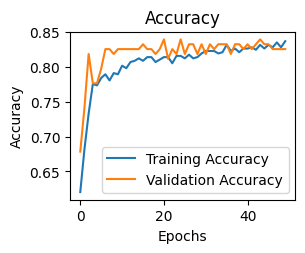

In [26]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

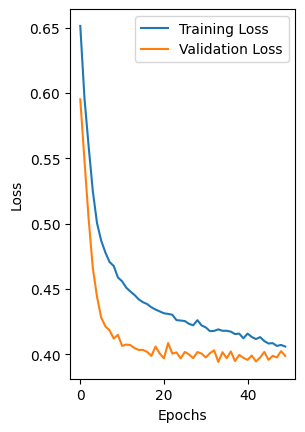

In [27]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


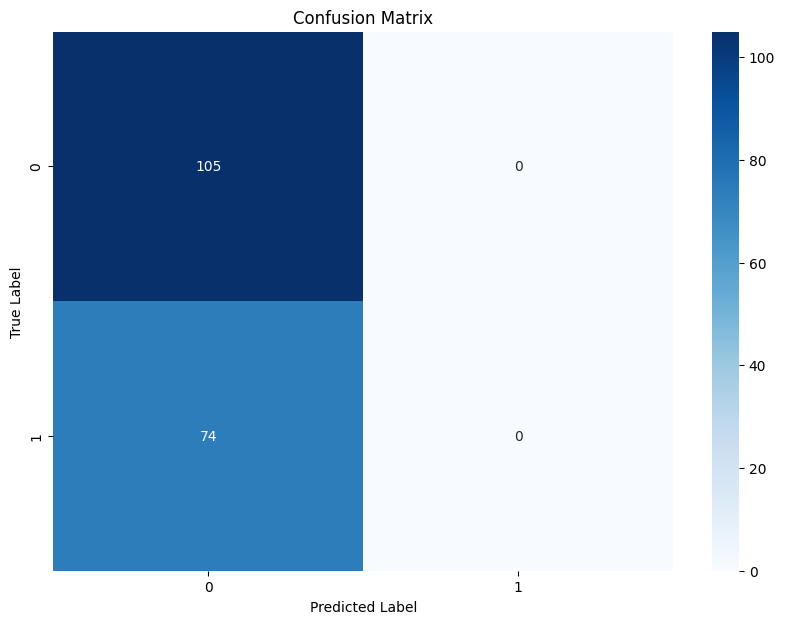

Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # Now np.argmax will be recognized

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [29]:
sample_input = np.array([[3, 1, 22, 1, 0, 7.25, 0]])
sample_input_df = pd.DataFrame(sample_input,
                               columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

In [30]:
sample_input_scaled = scaler.transform(sample_input_df)

In [31]:
y_test_all_dead = np.zeros_like(y_test)

In [32]:
# Gunakan model untuk prediksi pada X_test
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [33]:
# Tampilkan confusion matrix dan laporan klasifikasi
print("Confusion Matrix:")
print(confusion_matrix(y_test_all_dead, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_all_dead, y_pred_classes))

Confusion Matrix:
[[116  63]
 [  0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       179
           1       0.00      0.00      0.00         0

    accuracy                           0.65       179
   macro avg       0.50      0.32      0.39       179
weighted avg       1.00      0.65      0.79       179



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
percent_dead = np.mean(y_pred_classes == 0) * 100
print(f"Persentase prediksi 'tidak selamat': {percent_dead:.2f}%")

Persentase prediksi 'tidak selamat': 64.80%


## Save Model

In [36]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('titanic_survival_prediction.tflite', 'wb') as f:
    f.write(tflite_model)

files.download('titanic_survival_prediction.tflite')

Saved artifact at '/tmp/tmplu2krvjd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136390953342288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136390953343248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136390953345168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136390953342864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136390953345360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136390953341712: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>